In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy.polynomial.polynomial as poly

In [11]:
df_ref = pd.read_csv('/Users/jiahaozhan/Desktop/data and scripts/isolator_test_Jiahao/spectrum/ref.csv')
wavel = df_ref["0"].to_numpy()
wavel = wavel/1e-9
ref = df_ref["1"].to_numpy()

root = "/Users/jiahaozhan/Desktop/data and scripts/isolator_test_Jiahao/spectrum/in-out_Andrew/"
io_chans = []
for i in range(8):
    fname = f"Iso_{i+1}_bc_{i+3}.csv"
    print(fname)
    df = pd.read_csv(root+fname)
    chan = df["1"].to_numpy()
    io_chans.append(chan)

root = "/Users/jiahaozhan/Desktop/data and scripts/isolator_test_Jiahao/spectrum/out-in/"
oi_chans = []
for i in range(8):
    fname = f"bc_{i+3}_iso_{i+1}.csv"
    df = pd.read_csv(root+fname)
    chan = df["1"].to_numpy()
    oi_chans.append(chan)

Iso_1_bc_3.csv
Iso_2_bc_4.csv
Iso_3_bc_5.csv
Iso_4_bc_6.csv
Iso_5_bc_7.csv
Iso_6_bc_8.csv
Iso_7_bc_9.csv
Iso_8_bc_10.csv


Text(0.5, 1.0, 'SN: H2304230009')

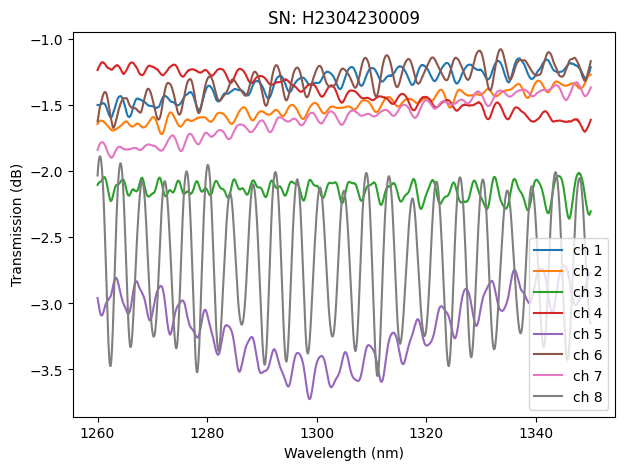

In [12]:
# plot the results
fig, axes = plt.subplots(1,1, figsize=(7, 5))
ax = axes
for i, chan in enumerate(io_chans):
    ax.plot(wavel, np.subtract(ref, chan), label=f'ch {i+1}')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.legend()
ax.set_title('SN: H2304230009')

# ax = axes[0][1]
# for i, chan in enumerate(oi_chans):
#     ax.plot(wavel, np.subtract(ref, chan), label=f'ch {i+1}')
# ax.set_xlabel('Wavelength (nm)')
# ax.set_ylabel('Transmission (dB)')
# ax.legend()
# ax.set_title('Output to input')
# # ax.set_ylim([-30, -22])

# ax = axes[1][0]
# for i, io, oi in zip(range(8), io_chans, oi_chans):
#     ax.plot(wavel, np.subtract(oi, io), label=f'ch {i+1}')
# ax.set_xlabel('Wavelength (nm)')
# ax.set_ylabel('Extinction ratio (dB)')
# ax.legend()
# # ax.set_title('Extinction ratio')
# plt.show()

In [14]:
p_current = Path().absolute().parent
root = p_current / 'isolator_test_Jiahao'

df_ref = pd.read_csv(root / 'spectrum' / 'ref.csv')
wavel = df_ref["0"].to_numpy()
wavel = wavel/1e-9
ref = df_ref["1"].to_numpy()

fdir = root / 'spectrum_MT_cable'
io_chans_mt = []
for i in range(4):
    fname = f"iso_{i+1}_bc_{i+3}_MT.csv"
    df = pd.read_csv(fdir / fname)
    chan = df["1"].to_numpy()
    io_chans_mt.append(chan)

print(io_chans_mt)

[array([1.18335474, 1.18171203, 1.1798228 , ..., 0.98675394, 0.98652971,
       0.98735243]), array([1.60347342, 1.60621214, 1.60825109, ..., 0.97813427, 0.97265863,
       0.96801722]), array([2.10911489, 2.10684204, 2.10405922, ..., 2.04014325, 2.03285861,
       2.0271256 ]), array([1.51761115, 1.51445341, 1.51084125, ..., 1.61074018, 1.60997963,
       1.60982585])]


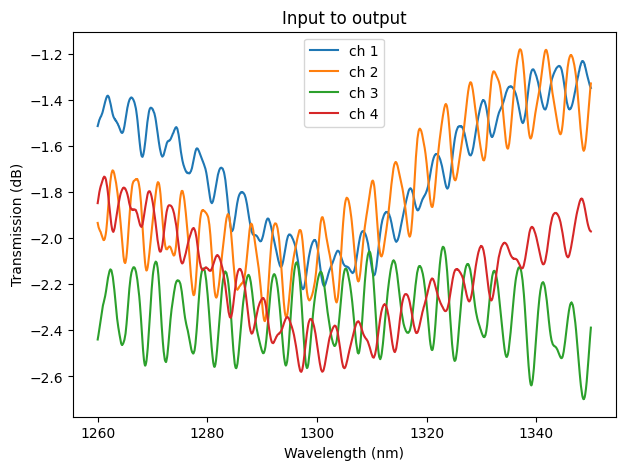

In [15]:
# plot the results
fig, ax = plt.subplots(1,1, figsize=(7, 5))
for i, chan in enumerate(io_chans_mt):
    ax.plot(wavel, np.subtract(ref, chan), label=f'ch {i+1}')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.legend()
ax.set_title('Input to output')
plt.show()

In [36]:
# data fitting
coefs, ffit, coefs_mt, ffit_mt = [], [], [], []

for i in range(4):
    coefs.append(poly.polyfit(wavel, np.subtract(ref, io_chans[i]), 12))
    ffit.append(poly.Polynomial(coefs[i]))
    coefs_mt.append(poly.polyfit(wavel, np.subtract(ref, io_chans_mt[i]), 12))
    ffit_mt.append(poly.Polynomial(coefs_mt[i]))

The excess loss at 1310 nm of ch1 is 0.56 dB.
The excess loss at 1310 nm of ch2 is 0.35 dB.
The excess loss at 1310 nm of ch3 is 0.59 dB.
The excess loss at 1310 nm of ch4 is 0.94 dB.


Text(0.5, 1.0, 'Channel 4')

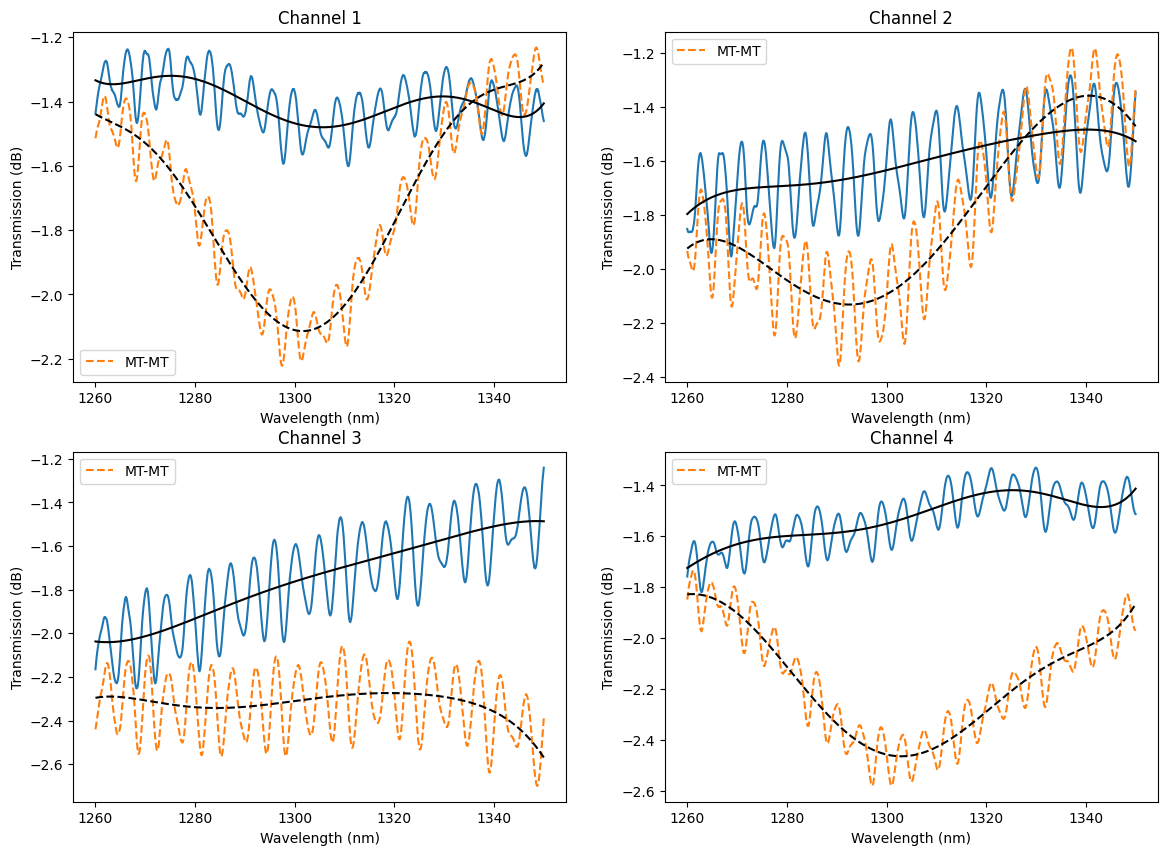

In [35]:
# compare the 4 channels side by side to see if there is an influence from the extra MT-MT cable
for i in range(4):
    print(f"The excess loss at 1310 nm of ch{i+1} is {ffit[i](1310) - ffit_mt[i](1310):.2f} dB.")
    
fig, axes = plt.subplots(2,2, figsize=(14, 10))
ax = axes[0][0]
ax.plot(wavel, np.subtract(ref, io_chans[0]))
ax.plot(wavel, np.subtract(ref, io_chans_mt[0]), '--', label=f'MT-MT')
ax.plot(wavel, ffit[0](wavel), 'k')
ax.plot(wavel, ffit_mt[0](wavel), 'k--')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.legend()
ax.set_title('Channel 1')

ax = axes[0][1]
ax.plot(wavel, np.subtract(ref, io_chans[1]))
ax.plot(wavel, np.subtract(ref, io_chans_mt[1]), '--', label=f'MT-MT')
ax.plot(wavel, ffit[1](wavel), 'k')
ax.plot(wavel, ffit_mt[1](wavel), 'k--')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.legend()
ax.set_title('Channel 2')

ax = axes[1][0]
ax.plot(wavel, np.subtract(ref, io_chans[2]))
ax.plot(wavel, np.subtract(ref, io_chans_mt[2]), '--', label=f'MT-MT')
ax.plot(wavel, ffit[2](wavel), 'k')
ax.plot(wavel, ffit_mt[2](wavel), 'k--')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.legend()
ax.set_title('Channel 3')

ax = axes[1][1]
ax.plot(wavel, np.subtract(ref, io_chans[3]))
ax.plot(wavel, np.subtract(ref, io_chans_mt[3]), '--', label=f'MT-MT')
ax.plot(wavel, ffit[3](wavel), 'k')
ax.plot(wavel, ffit_mt[3](wavel), 'k--')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
ax.legend()
ax.set_title('Channel 4')

In [43]:
root = Path().absolute().parent / 'isolator_test_Jiahao'
fdir = root / 'high_power'
ref_name = 'ref.csv'
print(fdir / ref_name)

ref_hp = pd.read_csv(fdir / ref_name)
print(ref_hp.columns.values)

/Users/jiahaozhan/Desktop/data and scripts/isolator_test_Jiahao/high_power/ref.csv
['Unnamed: 0' 'laser_current' 'voltage' 'power' 'temperature' 'time']


In [54]:
ld_curr = ref_hp['laser_current'].to_numpy()
ref_pwr_mW = ref_hp['power'].to_numpy()
ref_pwr_dBm = 10*np.log10(ld_pwr_mW)

/var/folders/ch/rfyq2j3x4fsf6nld0yfd9vkm0000gn/T/ipykernel_2857/1332440580.py:3: RuntimeWarning: invalid value encountered in log10
  ref_pwr_dBm = 10*np.log10(ld_pwr_mW)


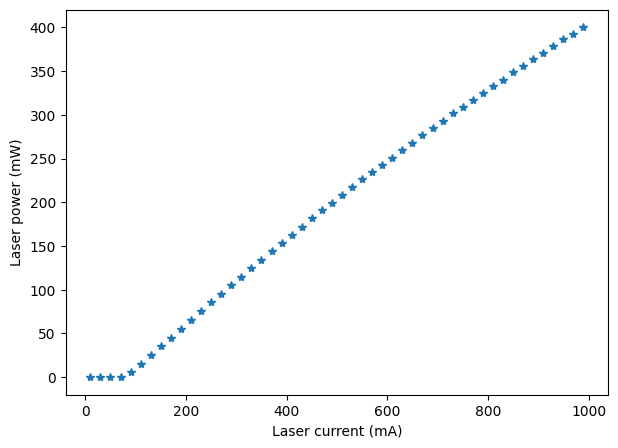

In [55]:
fig, ax = plt.subplots(1,1, figsize=(7, 5))
ax.plot(ld_curr, ref_pwr_mW, '*')
ax.set_xlabel('Laser current (mA)')
ax.set_ylabel('Laser power (mW)')
plt.show()

In [ ]:
io_chans_hp_mW = []
io_chans_hp_dBm = []

for i in range(8):
    fname = f"iso_{i+1}_bc_{i+3}.csv"
    df = pd.read_csv(fdir / fname)
    pwr_mW = df['power'].to_numpy()
    pwr_dBm = 10*np.log10(pwr_mW)
    
    io_chans_hp_mW.append(pwr_mW)
    io_chans_hp_dBm.append(pwr_dBm)

print(io_chans_hp_mW)

50
50


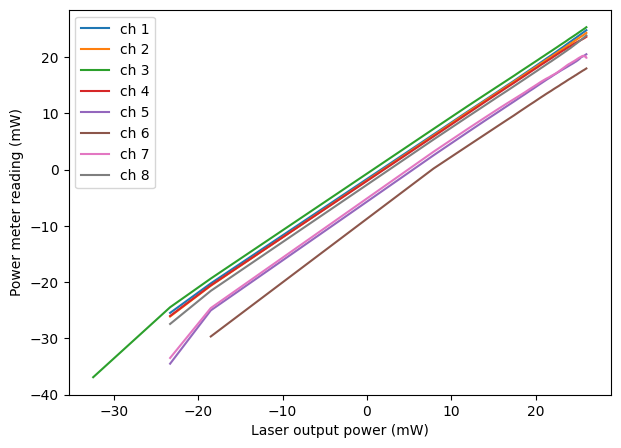

In [67]:
print(len(ref_pwr_mW))
print(len(io_chans_hp_mW[0]))

fig, ax = plt.subplots(1,1, figsize=(7, 5))
for i, chan in enumerate(io_chans_hp):
    ax.plot(ref_pwr_dBm, io_chans_hp_dBm[i], label=f'ch {i+1}')
ax.set_xlabel('Laser output power (mW)')
ax.set_ylabel('Power meter reading (mW)')
ax.legend()
plt.show()

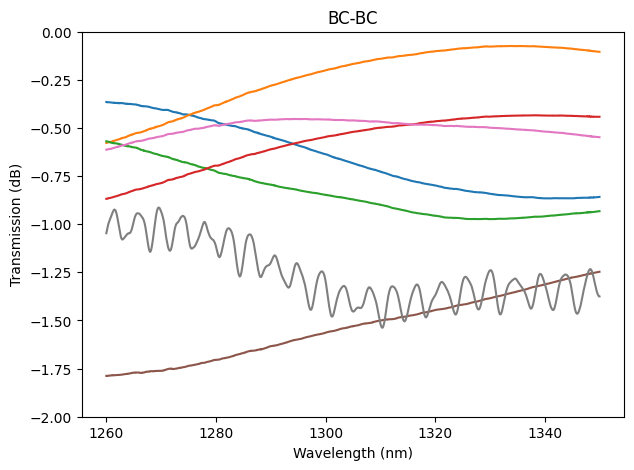

In [77]:
# Breakout cable measurement
root = Path().resolve().parent / 'isolator_test_Jiahao' / 'MT-MT'
bc_chans = []
for i in range(8):
    fname = f"bc_{i+3}_bc_{i+3}.csv"
    df = pd.read_csv(root / fname)
    chan = df["1"].to_numpy()
    bc_chans.append(chan)

fig, ax = plt.subplots(1,1, figsize=(7, 5))
for i, chan in enumerate(bc_chans):
    ax.plot(wavel, -chan, label=f'ch {i+3}')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission (dB)')
# ax.legend()
ax.set_title('BC-BC')
ax.set_ylim([-2, 0])
plt.show()